In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rcParams.update({'font.size': 14})
import seaborn as sns
sns.set_style("darkgrid")

In [6]:
x_axis= [1, 2, 4, 8, 12, 26, 36, 48, 64]
ms = 5
n_tasks = 512
target = [(ms * n_tasks)/i for i in x_axis]
xticks = [1]
for i in range(5, x_axis[-1], 5):
    xticks.append(i)
if xticks[-1] != x_axis[-1]:
    xticks.append(x_axis[-1])

In [7]:
processes = [2585.001, 1297.786, 654.838, 337.387, 236.069, 152.585, 157.01, 186.861, 266.056]
subinterpreters = [2600.549, 1318.94, 686.384, 371.906, 276.398, 210.945, 226.03, 251.978, 315.631]
sequential = [2585 for _ in range(16)]

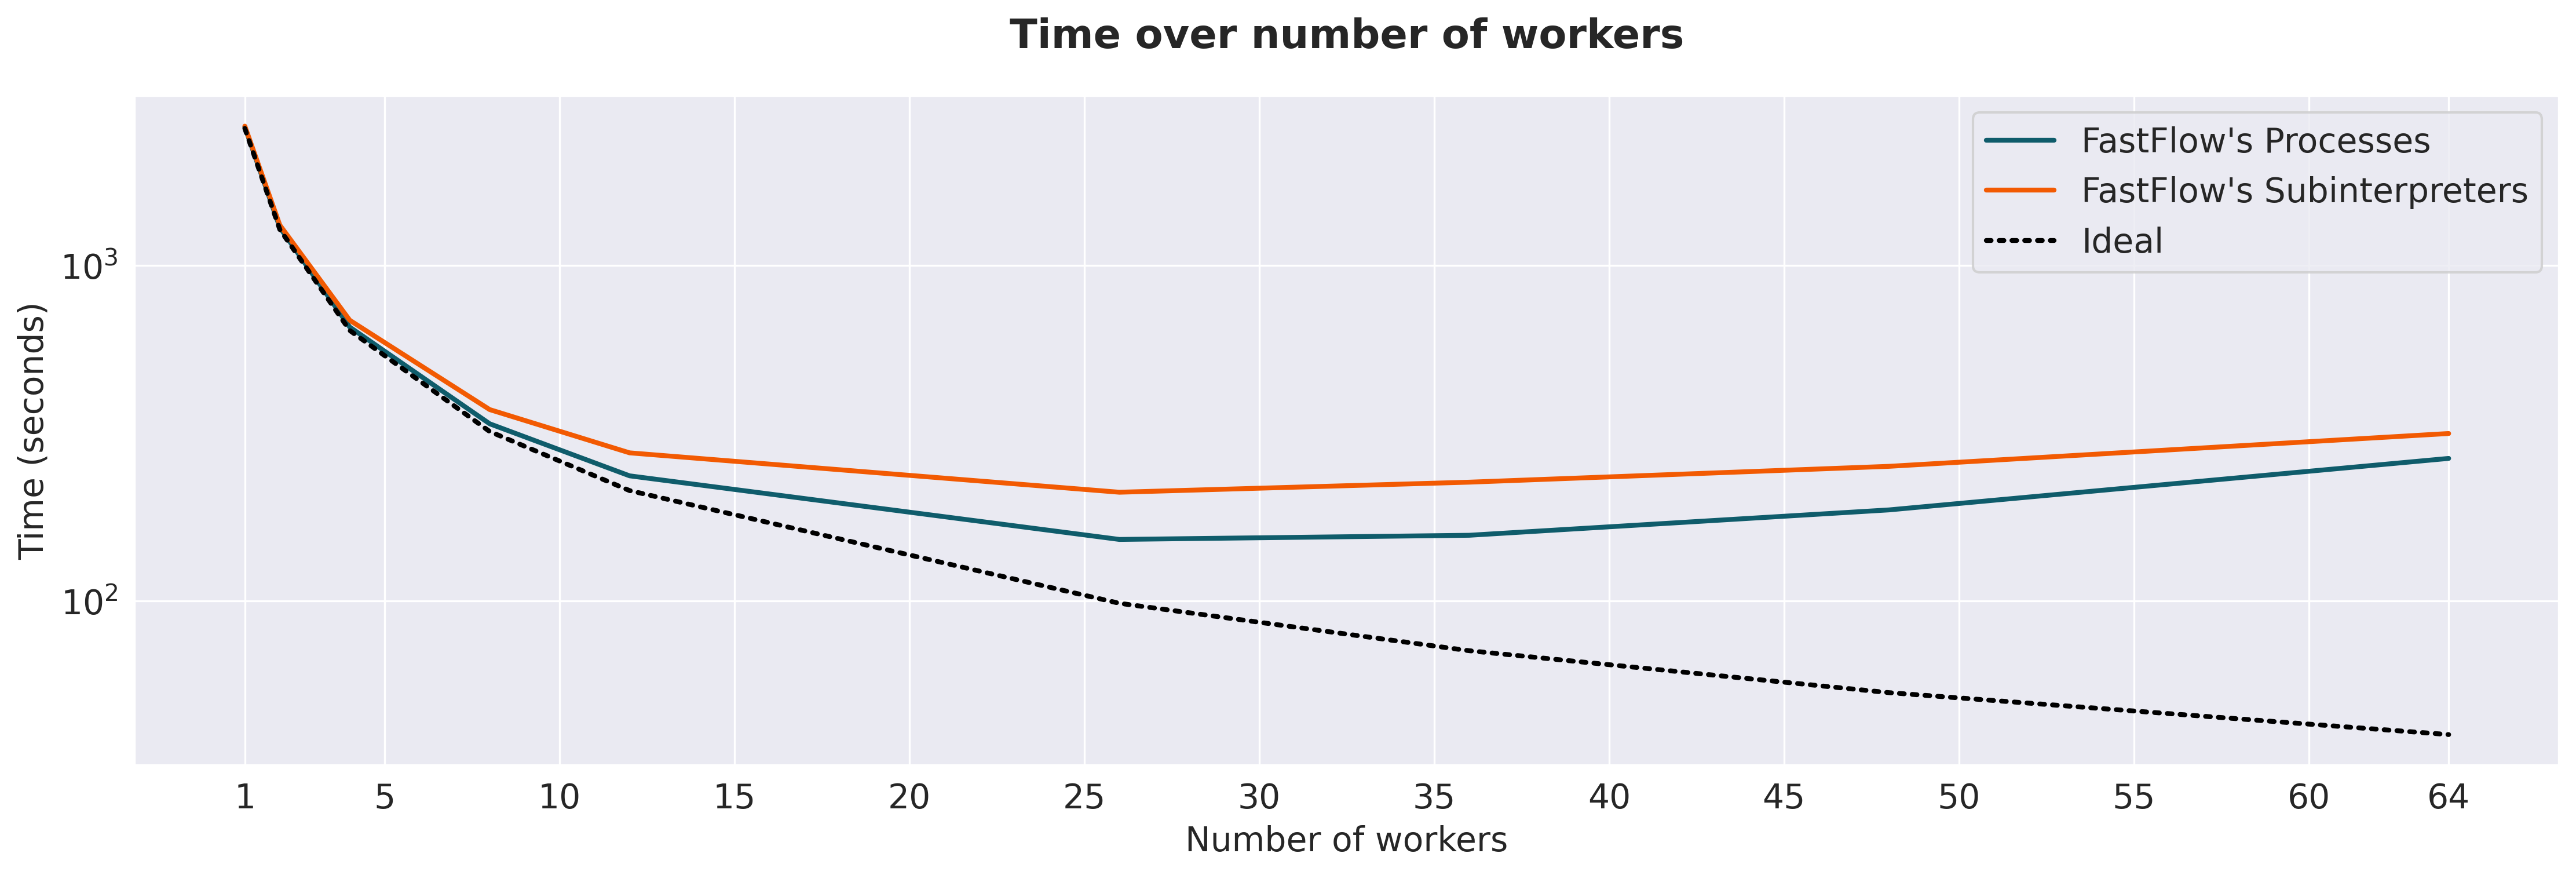

In [9]:
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
colors = ["#A0D2DB", "#188FA7", "#0F5C6B", "#F25A02"]
linewidth = 2
style = '--'
plt.plot(x_axis, processes, '-', label="FastFlow's Processes", linewidth=linewidth, color=colors[2])[0].set_dash_capstyle('round')
plt.plot(x_axis, subinterpreters, '-', label="FastFlow's Subinterpreters", linewidth=linewidth, color=colors[3])[0].set_dash_capstyle('round')
plt.plot(x_axis, target, ls="dotted", label="Ideal", linewidth=linewidth, color="black")[0].set_dash_capstyle('round')

axs.set_xlabel("Number of workers")
axs.set_ylabel("Time (seconds)")
# Setting the number of ticks
#axs.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(xticks, labels=xticks)
#axs.yaxis.set_major_locator(ticker.MultipleLocator(2))
axs.yaxis.set_major_formatter(ticker.ScalarFormatter())
axs.yaxis.set_minor_formatter(ticker.ScalarFormatter())
axs.tick_params(which='minor', length=0)

plt.title('Time over number of workers', fontweight="bold", y=1.05)
plt.legend()
plt.yscale('log')
#plt.savefig("with-numpy", bbox_inches="tight")
plt.show()

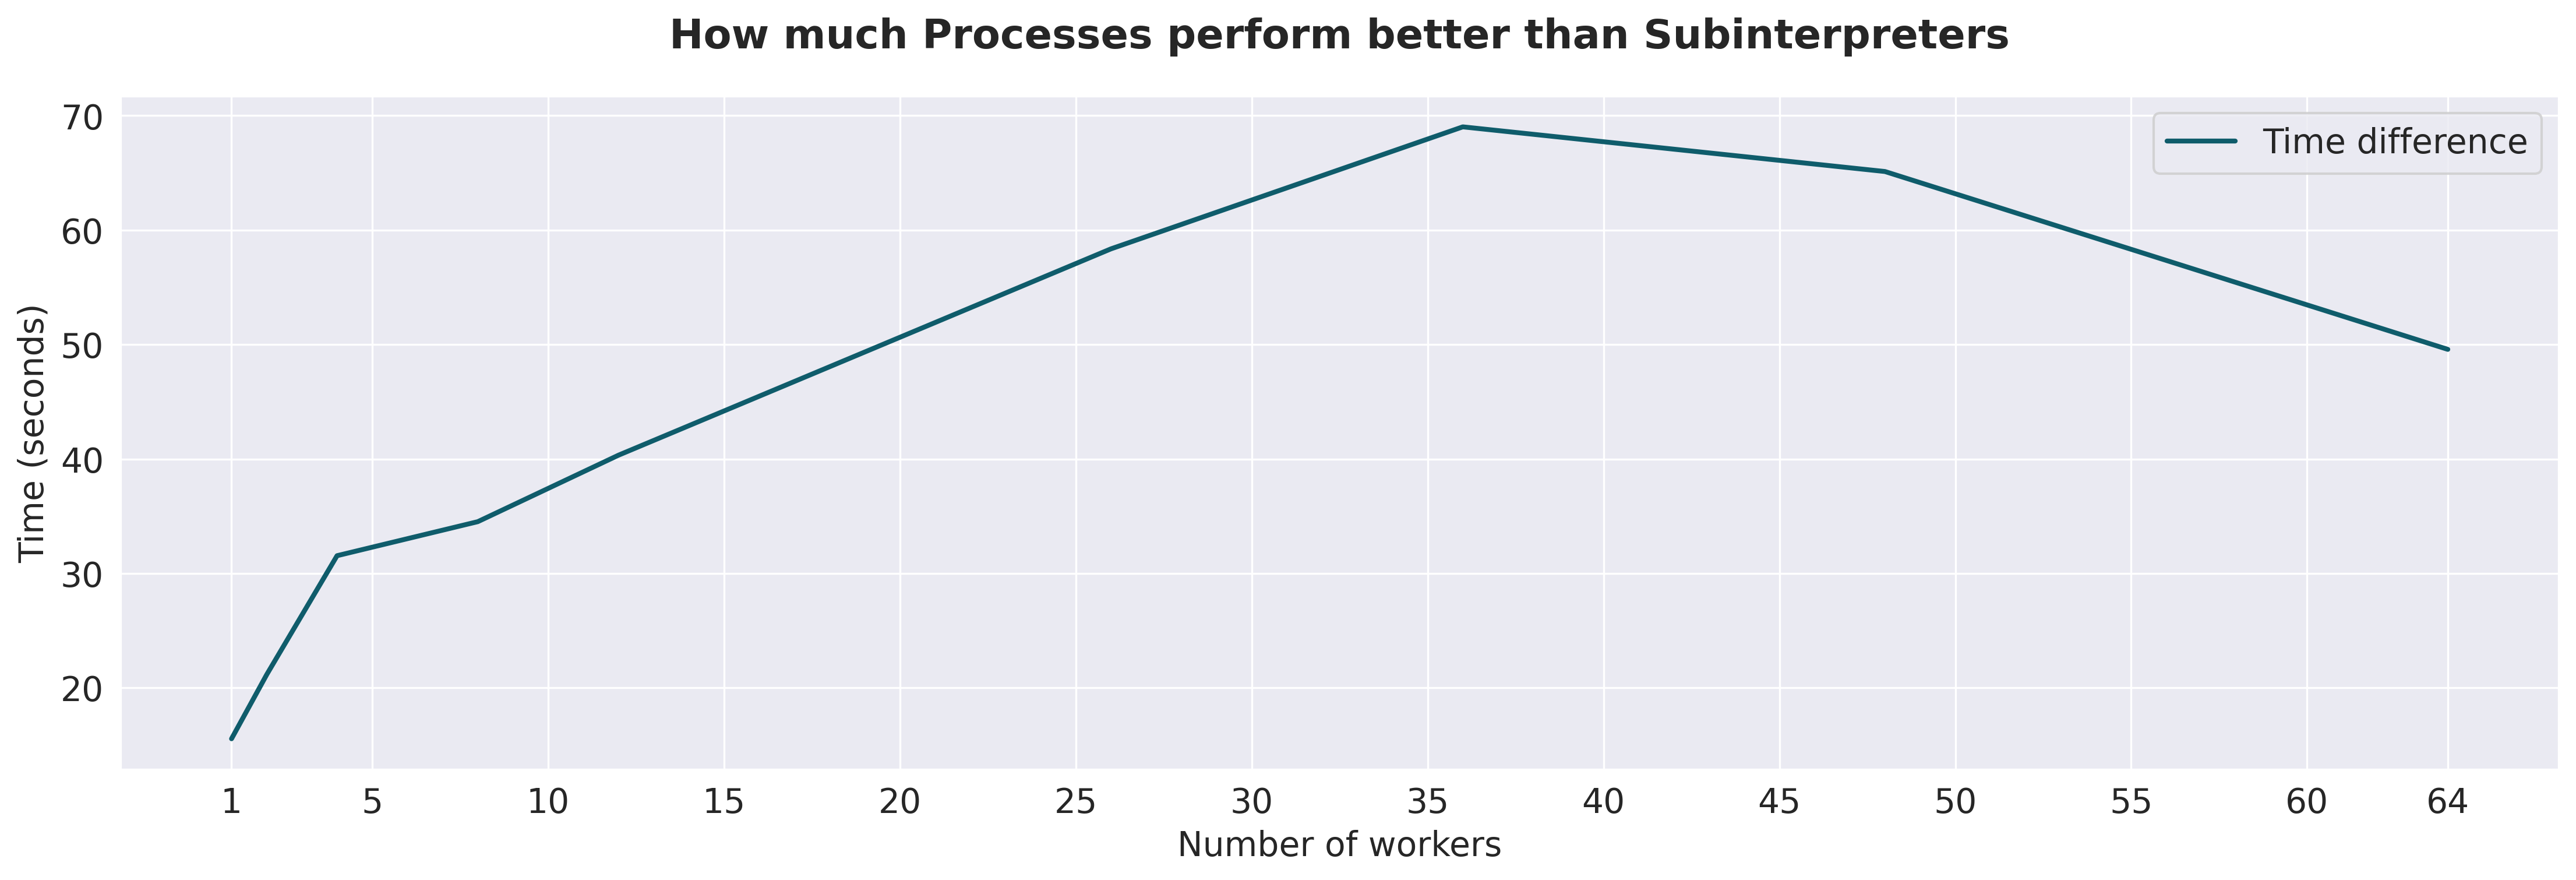

In [12]:
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
colors = ["#A0D2DB", "#188FA7", "#0F5C6B", "#F25A02"]
linewidth = 2
style = '--'
plt.plot(x_axis, [subinterpreters[i] - processes[i] for i in range(len(subinterpreters))], '-', label="Time difference", linewidth=linewidth, color=colors[2])[0].set_dash_capstyle('round')

axs.set_xlabel("Number of workers")
axs.set_ylabel("Time (seconds)")
# Setting the number of ticks
#axs.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xticks(xticks, labels=xticks)
axs.yaxis.set_major_locator(ticker.MultipleLocator(10))
axs.yaxis.set_major_formatter(ticker.ScalarFormatter())
axs.yaxis.set_minor_formatter(ticker.ScalarFormatter())
axs.tick_params(which='minor', length=0)

plt.title('How much Processes perform better than Subinterpreters', fontweight="bold", y=1.05)
plt.legend()
#plt.savefig("with-numpy", bbox_inches="tight")
plt.show()